# Test Cell

In [1]:
import os
import numpy as np
import pandas as pd

# Root path to your dataset
dataset_root = '/kaggle/input/puma-dataset/PUMA'

# Recursively walk through all subdirectories and print files
for foldername, subfolders, filenames in os.walk(dataset_root):
    print(f"\n📁 Folder: {foldername}")
    for filename in filenames:
        file_path = os.path.join(foldername, filename)
        print(f"  └── {file_path}")



📁 Folder: /kaggle/input/puma-dataset/PUMA
  └── /kaggle/input/puma-dataset/PUMA/.gitattributes

📁 Folder: /kaggle/input/puma-dataset/PUMA/01_training_dataset_tif_context_ROIs

📁 Folder: /kaggle/input/puma-dataset/PUMA/01_training_dataset_tif_context_ROIs/01_training_dataset_tif_context_ROIs
  └── /kaggle/input/puma-dataset/PUMA/01_training_dataset_tif_context_ROIs/01_training_dataset_tif_context_ROIs/training_set_metastatic_roi_078_context.tif
  └── /kaggle/input/puma-dataset/PUMA/01_training_dataset_tif_context_ROIs/01_training_dataset_tif_context_ROIs/training_set_primary_roi_068_context.tif
  └── /kaggle/input/puma-dataset/PUMA/01_training_dataset_tif_context_ROIs/01_training_dataset_tif_context_ROIs/training_set_metastatic_roi_063_context.tif
  └── /kaggle/input/puma-dataset/PUMA/01_training_dataset_tif_context_ROIs/01_training_dataset_tif_context_ROIs/training_set_primary_roi_061_context.tif
  └── /kaggle/input/puma-dataset/PUMA/01_training_dataset_tif_context_ROIs/01_training_da

# Load dataset into arrays

In [2]:
import os

base_path = '/kaggle/input/puma-dataset/PUMA'

# Define full folder paths
nuclei_geojson_path = os.path.join(base_path, '01_training_dataset_geojson_nuclei')
tissue_geojson_path = os.path.join(base_path, '01_training_dataset_geojson_tissue', '01_training_dataset_geojson_tissue')
roi_tif_path = os.path.join(base_path, '01_training_dataset_tif_ROIs', '01_training_dataset_tif_ROIs')
context_tif_path = os.path.join(base_path, '01_training_dataset_tif_context_ROIs', '01_training_dataset_tif_context_ROIs')

# Load all files into separate arrays (sorted to align indices)
nuclei_files = sorted([os.path.join(nuclei_geojson_path, f) for f in os.listdir(nuclei_geojson_path) if f.endswith('.geojson')])
tissue_files = sorted([os.path.join(tissue_geojson_path, f) for f in os.listdir(tissue_geojson_path) if f.endswith('.geojson')])
roi_tif_files = sorted([os.path.join(roi_tif_path, f) for f in os.listdir(roi_tif_path) if f.endswith('.tif')])
context_tif_files = sorted([os.path.join(context_tif_path, f) for f in os.listdir(context_tif_path) if f.endswith('.tif')])

# Sanity check
print("🧠 Nuclei:", nuclei_files[0])
print("🧫 Tissue:", tissue_files[0])
print("🖼️  ROI TIF:", roi_tif_files[0])
print("🌍 Context TIF:", context_tif_files[0])


🧠 Nuclei: /kaggle/input/puma-dataset/PUMA/01_training_dataset_geojson_nuclei/training_set_metastatic_roi_001_nuclei.geojson
🧫 Tissue: /kaggle/input/puma-dataset/PUMA/01_training_dataset_geojson_tissue/01_training_dataset_geojson_tissue/training_set_metastatic_roi_001_tissue.geojson
🖼️  ROI TIF: /kaggle/input/puma-dataset/PUMA/01_training_dataset_tif_ROIs/01_training_dataset_tif_ROIs/training_set_metastatic_roi_001.tif
🌍 Context TIF: /kaggle/input/puma-dataset/PUMA/01_training_dataset_tif_context_ROIs/01_training_dataset_tif_context_ROIs/training_set_metastatic_roi_001_context.tif


# Load File Contents

In [3]:
import geopandas as gpd
import rasterio

IMAGE_NUMBER = 12

# Load geojson
nuclei_gdf = gpd.read_file(nuclei_files[IMAGE_NUMBER])
tissue_gdf = gpd.read_file(tissue_files[IMAGE_NUMBER])

# Load tiff
with rasterio.open(roi_tif_files[IMAGE_NUMBER]) as roi_tif:
    roi_image = roi_tif.read()
    roi_transform = roi_tif.transform

with rasterio.open(context_tif_files[IMAGE_NUMBER]) as context_tif:
    context_image = context_tif.read()

roi_image_matplotlib = roi_image.transpose(1, 2, 0)
context_image_matplotlib = context_image.transpose(1, 2, 0)

print(nuclei_gdf.head())  # See the data structure


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


                                     id  objectType  \
0  6ba57793-67c3-491c-8a65-e8783bbb5ee9  annotation   
1  0d23fa6d-e542-42ec-90ec-5e75292f8ce7  annotation   
2  dde9c81f-56dc-48ce-8a2d-e6f7191cb394  annotation   
3  49a0ac81-cdf2-4e09-a3bb-9af8f2500623  annotation   
4  4a62e722-b415-4b44-a2d3-660015eed876  annotation   

                                   classification  \
0  {'name': 'nuclei_tumor', 'color': [200, 0, 0]}   
1  {'name': 'nuclei_tumor', 'color': [200, 0, 0]}   
2  {'name': 'nuclei_tumor', 'color': [200, 0, 0]}   
3  {'name': 'nuclei_tumor', 'color': [200, 0, 0]}   
4  {'name': 'nuclei_tumor', 'color': [200, 0, 0]}   

                                            geometry  
0  POLYGON ((105.00000 0.00000, 105.00000 1.00000...  
1  POLYGON ((414.00000 0.00000, 414.00000 1.00000...  
2  POLYGON ((596.00000 0.00000, 596.00000 8.00000...  
3  POLYGON ((679.00000 0.00000, 679.00000 1.00000...  
4  POLYGON ((769.00000 0.00000, 769.00000 5.00000...  


# Setup the functions for plotting and data extraction

In [4]:
import matplotlib.pyplot as plt
from rasterio.plot import show
from shapely.geometry import Polygon, MultiPolygon
import json

# Assuming nuclei_gdf and tissue_gdf are loaded, and roi_image, roi_transform exist

def get_classification_dict(row):
    classification = row.get('classification') or row.get('properties', {}).get('classification')
    if classification is None:
        return None
    if isinstance(classification, str):
        try:
            classification = json.loads(classification)
        except json.JSONDecodeError:
            return None
    return classification

def get_name(row):
    c = get_classification_dict(row)
    if c and 'name' in c:
        return c['name']
    return 'unknown'

def get_color(row):
    c = get_classification_dict(row)
    if c and 'color' in c:
        return tuple(x / 255 for x in c['color'])
    return (1, 1, 1)  # fallback white

# Fix invalid geometries
nuclei_gdf = nuclei_gdf[nuclei_gdf.is_valid]
tissue_gdf = tissue_gdf[tissue_gdf.is_valid]

nuclei_gdf['class_color'] = nuclei_gdf.apply(get_color, axis=1)
nuclei_gdf['class_name'] = nuclei_gdf.apply(get_name, axis=1)

tissue_gdf['class_color'] = tissue_gdf.apply(get_color, axis=1)
tissue_gdf['class_name'] = tissue_gdf.apply(get_name, axis=1)

# Plot the images with annotations for tissue and nuclei

roi_image shape: (4, 1024, 1024)
roi_transform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|


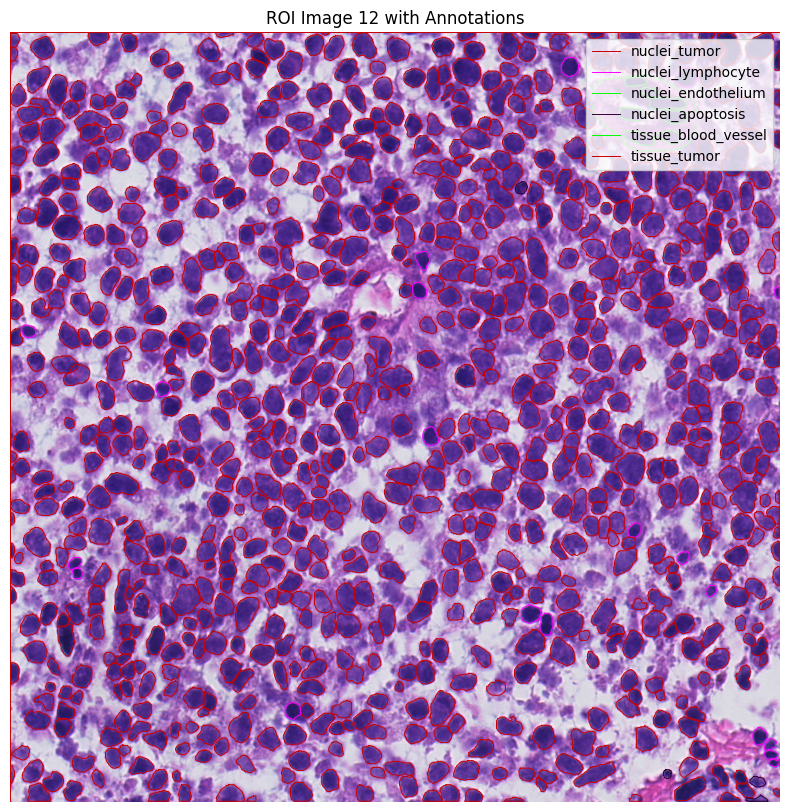

In [5]:
# Plot ROI image and annotations
fig, ax = plt.subplots(figsize=(10, 10))

print("roi_image shape:", roi_image.shape)
print("roi_transform:", roi_transform)

show(roi_image, transform=roi_transform, ax=ax, cmap='gray')

for _, row in nuclei_gdf.iterrows():
    geom = row.geometry
    if geom.is_empty:
        continue
        
    if isinstance(geom, Polygon):
        x, y = geom.exterior.xy
        ax.plot(x, y, color=get_color(row), linewidth=0.7, label=get_name(row))

    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:  # iterate over each polygon
            x, y = poly.exterior.xy
            ax.plot(x, y, color=get_color(row), linewidth=0.7, label=get_name(row))

for _, row in tissue_gdf.iterrows():
    geom = row.geometry
    if geom.is_empty:
        continue

    
    if isinstance(geom, Polygon):
        x, y = geom.exterior.xy
        ax.plot(x, y, color=get_color(row), linewidth=0.7, label=get_name(row))

    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:  # iterate over each polygon
            x, y = poly.exterior.xy
            ax.plot(x, y, color=get_color(row), linewidth=0.7, label=get_name(row))

# Remove duplicate labels in legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

ax.set_title(f"ROI Image {IMAGE_NUMBER} with Annotations")
ax.axis('off')
plt.show()

# Plot the images for nuclei with annotations

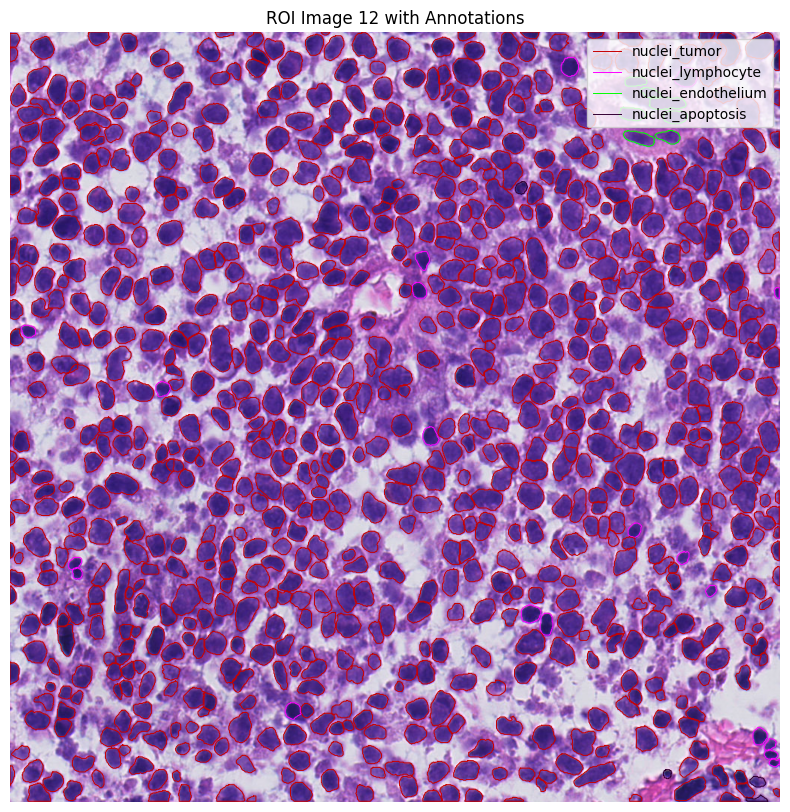

In [6]:
# Plot ROI image and annotations
fig, ax = plt.subplots(figsize=(10, 10))
show(roi_image, transform=roi_transform, ax=ax, cmap='gray')

for _, row in nuclei_gdf.iterrows():
    geom = row.geometry
    if geom.is_empty:
        continue
        
    if isinstance(geom, Polygon):
        x, y = geom.exterior.xy
        ax.plot(x, y, color=get_color(row), linewidth=0.7, label=get_name(row))

    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:  # iterate over each polygon
            x, y = poly.exterior.xy
            ax.plot(x, y, color=get_color(row), linewidth=0.7, label=get_name(row))

# Remove duplicate labels in legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

ax.set_title(f"ROI Image {IMAGE_NUMBER} with Annotations")
ax.axis('off')
plt.show()

# Plot the images for tissue with annotations

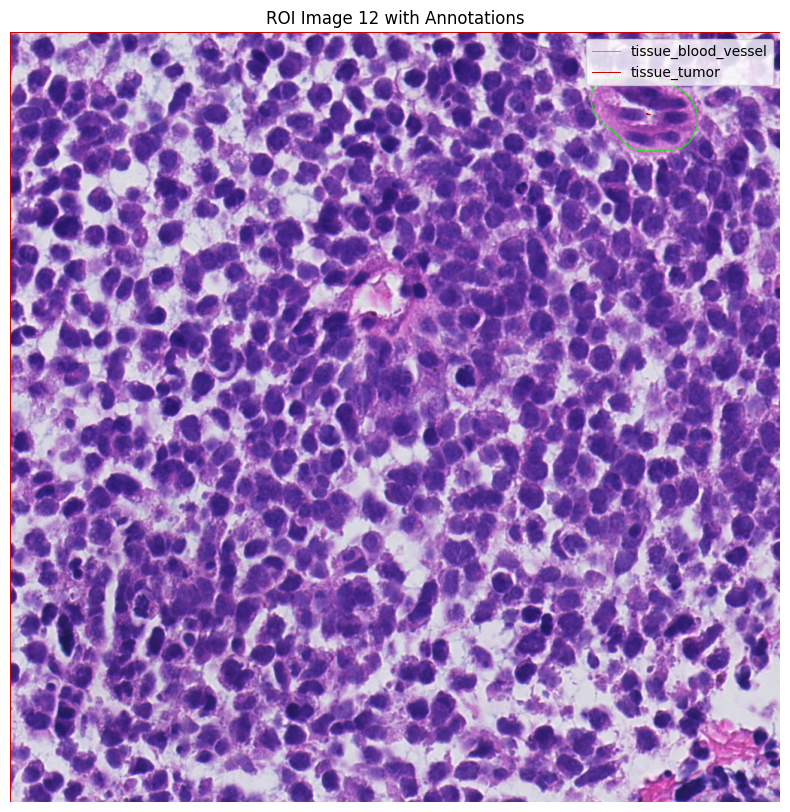

In [7]:
# Plot ROI image and annotations
fig, ax = plt.subplots(figsize=(10, 10))
show(roi_image, transform=roi_transform, ax=ax, cmap='gray')

for _, row in tissue_gdf.iterrows():
    geom = row.geometry
    if geom.is_empty:
        continue

    
    if isinstance(geom, Polygon):
        x, y = geom.exterior.xy
        ax.plot(x, y, color=get_color(row), linewidth=0.7, label=get_name(row))

    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:  # iterate over each polygon
            x, y = poly.exterior.xy
            ax.plot(x, y, color=get_color(row), linewidth=0.7, label=get_name(row))

# Remove duplicate labels in legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

ax.set_title(f"ROI Image {IMAGE_NUMBER} with Annotations")
ax.axis('off')
plt.show()

# Create Label Map for Mask Generation

In [8]:
# Your label list
unique_labels = [
    "nuclei_apoptosis",
    "nuclei_endothelium",
    "nuclei_epithelium",
    "nuclei_histiocyte",
    "nuclei_lymphocyte",
    "nuclei_melanophage",
    "nuclei_neutrophil",
    "nuclei_plasma_cell",
    "nuclei_stroma",
    "nuclei_tumor"
]

# Create mapping: label -> class index
class_id_map = {name: idx + 1 for idx, name in enumerate(unique_labels)}  # +1 to reserve 0 for background

# Create (geometry, value) pairs
shapes = [
    (geom, class_id_map[name])
    for geom, name in zip(nuclei_gdf.geometry, nuclei_gdf['class_name'])
    if geom.is_valid and name in class_id_map
]

# Plot the mask for nuclei segmentation

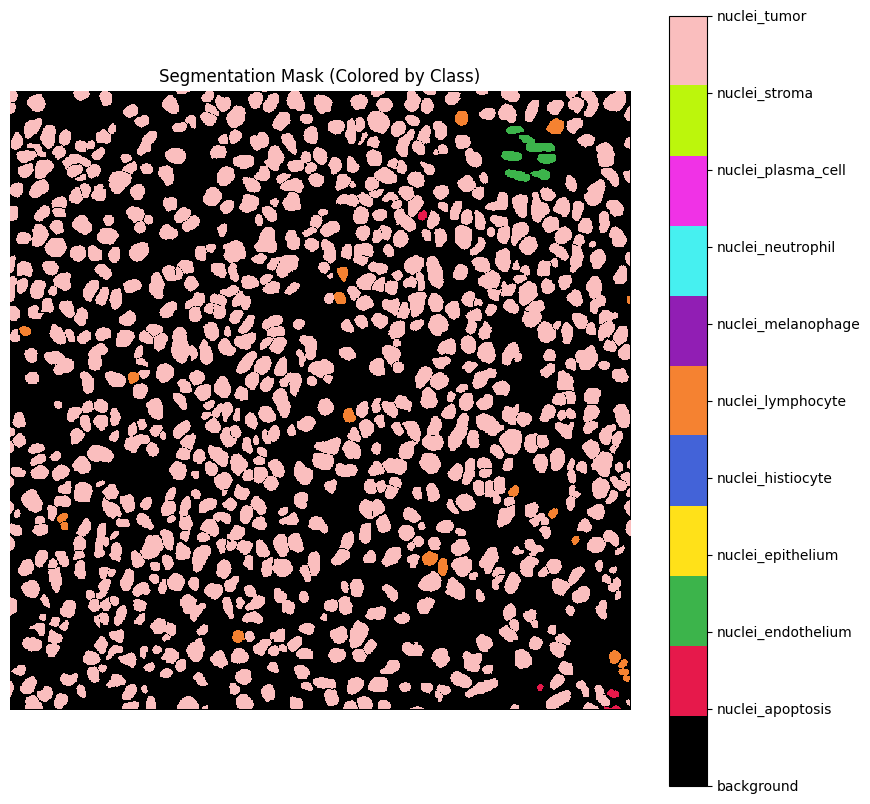

In [9]:
from rasterio.features import rasterize
import numpy as np

height, width = roi_image_matplotlib.shape[:2]
segmentation_mask = rasterize(
    shapes,
    out_shape=(height, width),
    transform=roi_transform,
    fill=0,            # background
    dtype='uint8',
    all_touched=False
)

# Optional: Colormap with 11 colors (0 = background, 1-10 = classes)
from matplotlib.colors import ListedColormap
cmap = ListedColormap([
    '#000000',  # background - black
    '#e6194b',  # red
    '#3cb44b',  # green
    '#ffe119',  # yellow
    '#4363d8',  # blue
    '#f58231',  # orange
    '#911eb4',  # purple
    '#46f0f0',  # cyan
    '#f032e6',  # magenta
    '#bcf60c',  # lime
    '#fabebe',  # pink
])

# Plot the mask
plt.figure(figsize=(10, 10))
plt.imshow(segmentation_mask, cmap=cmap, interpolation='nearest')
cbar = plt.colorbar(ticks=range(0, len(unique_labels) + 1))
cbar.set_ticklabels(['background'] + unique_labels)
plt.title("Segmentation Mask (Colored by Class)")
plt.axis('off')
plt.show()


# Generate mask and save for nuclei

Saved grayscale mask at: /kaggle/working/segmentation_masks/segmentation_mask_class_ids.png
Saved colored mask at: /kaggle/working/segmentation_masks/segmentation_mask_colored.png


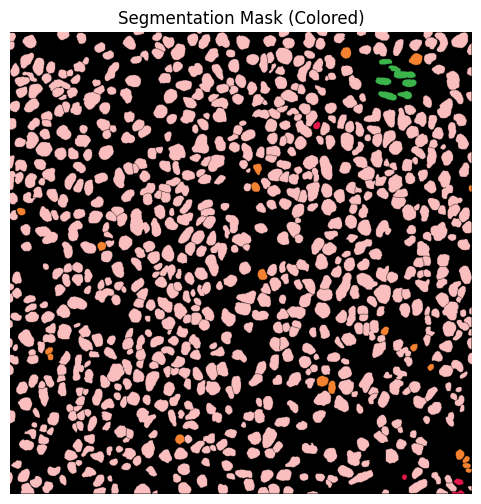

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
import os

# Example mask and colormap
# segmentation_mask = <your mask here>

# Save directory
output_dir = "/kaggle/working/segmentation_masks"
os.makedirs(output_dir, exist_ok=True)

# 1. Save grayscale class-ID mask
grayscale_path = os.path.join(output_dir, "segmentation_mask_class_ids.png")
Image.fromarray(segmentation_mask).save(grayscale_path)
print(f"Saved grayscale mask at: {grayscale_path}")

# 2. Save color RGB version
rgb_colormap = np.array([
    [0, 0, 0],        # background
    [230, 25, 75],    # red
    [60, 180, 75],    # green
    [255, 225, 25],   # yellow
    [67, 99, 216],    # blue
    [245, 130, 48],   # orange
    [145, 30, 180],   # purple
    [70, 240, 240],   # cyan
    [240, 50, 230],   # magenta
    [188, 246, 12],   # lime
    [250, 190, 190],  # pink
], dtype=np.uint8)

# Convert to RGB using the colormap
colored_mask = rgb_colormap[segmentation_mask]
colored_mask_img = Image.fromarray(colored_mask)
colored_path = os.path.join(output_dir, "segmentation_mask_colored.png")
colored_mask_img.save(colored_path)
print(f"Saved colored mask at: {colored_path}")

# Optionally display inside notebook
plt.figure(figsize=(6, 6))
plt.imshow(colored_mask)
plt.title("Segmentation Mask (Colored)")
plt.axis("off")
plt.show()


# Script for unique colors

In [11]:
from PIL import Image
import numpy as np

# Load the image
image_path = "/kaggle/working/segmentation_masks/segmentation_mask_class_ids.png"  # Replace with actual path
image = Image.open(image_path).convert("RGB")  # Ensure image is in RGB mode

# Convert image to NumPy array
image_np = np.array(image)

# Reshape to (num_pixels, 3)
pixels = image_np.reshape(-1, 3)

# Find unique RGB colors
unique_colors = np.unique(pixels, axis=0)

# Show results
print(f"✅ Total unique colors: {len(unique_colors)}")
print("🎨 First 10 unique colors (RGB):")
print(unique_colors[:10])


✅ Total unique colors: 5
🎨 First 10 unique colors (RGB):
[[ 0  0  0]
 [ 1  1  1]
 [ 2  2  2]
 [ 5  5  5]
 [10 10 10]]


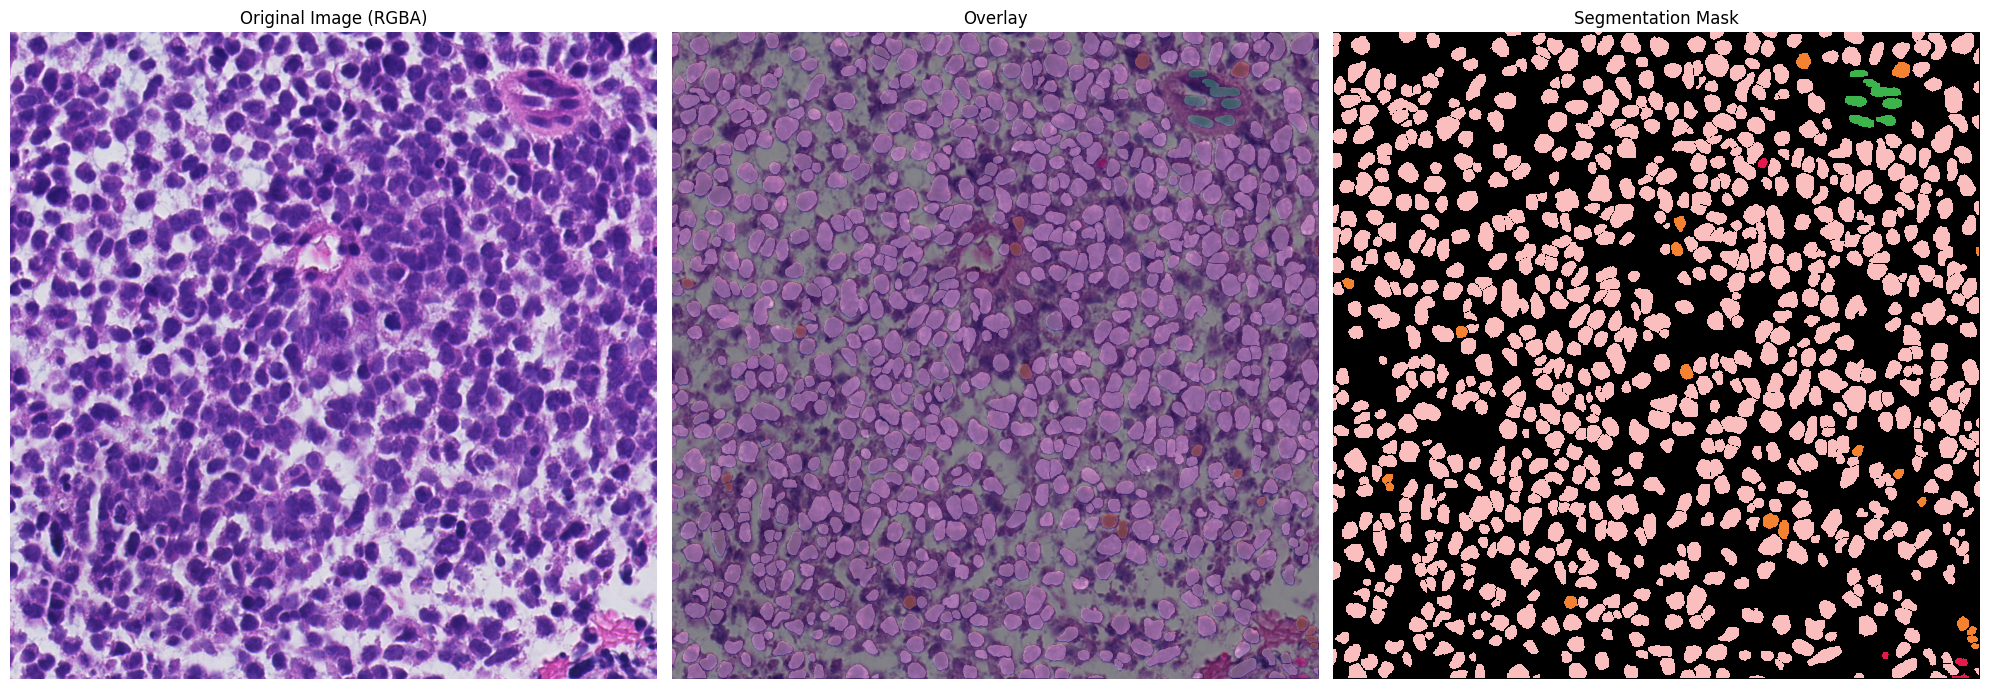

In [12]:
# Ensure original image has 4 channels
roi_rgba = roi_image_matplotlib  # shape: (H, W, 4)

# Normalize mask
if segmentation_mask.max() == 0:
    normalized_mask = segmentation_mask.astype(np.float32)
else:
    normalized_mask = segmentation_mask.astype(np.float32) / segmentation_mask.max()

# Apply colormap and overwrite alpha
mask_rgba = cmap(normalized_mask)
mask_rgba[..., 3] = 0.4  # Set alpha to 40% everywhere

# Convert to float
roi_rgb = roi_rgba[..., :3].astype(np.float32) / 255.0
mask_rgb = mask_rgba[..., :3].astype(np.float32)
alpha_mask = mask_rgba[..., 3:]  # Shape: (H, W, 1)

# Blend only RGB
overlay = roi_rgb * (1 - alpha_mask) + mask_rgb * alpha_mask
overlay_uint8 = (overlay * 255).astype(np.uint8)  # ✅ Scale only once

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].imshow(roi_rgba)
axes[0].set_title("Original Image (RGBA)")
axes[0].axis('off')

axes[1].imshow(overlay_uint8)
axes[1].set_title("Overlay")
axes[1].axis('off')

axes[2].imshow(segmentation_mask, cmap=cmap, interpolation='nearest')
axes[2].set_title("Segmentation Mask")
axes[2].axis('off')

plt.tight_layout()
plt.show()


# Combined plot with annotation and mask

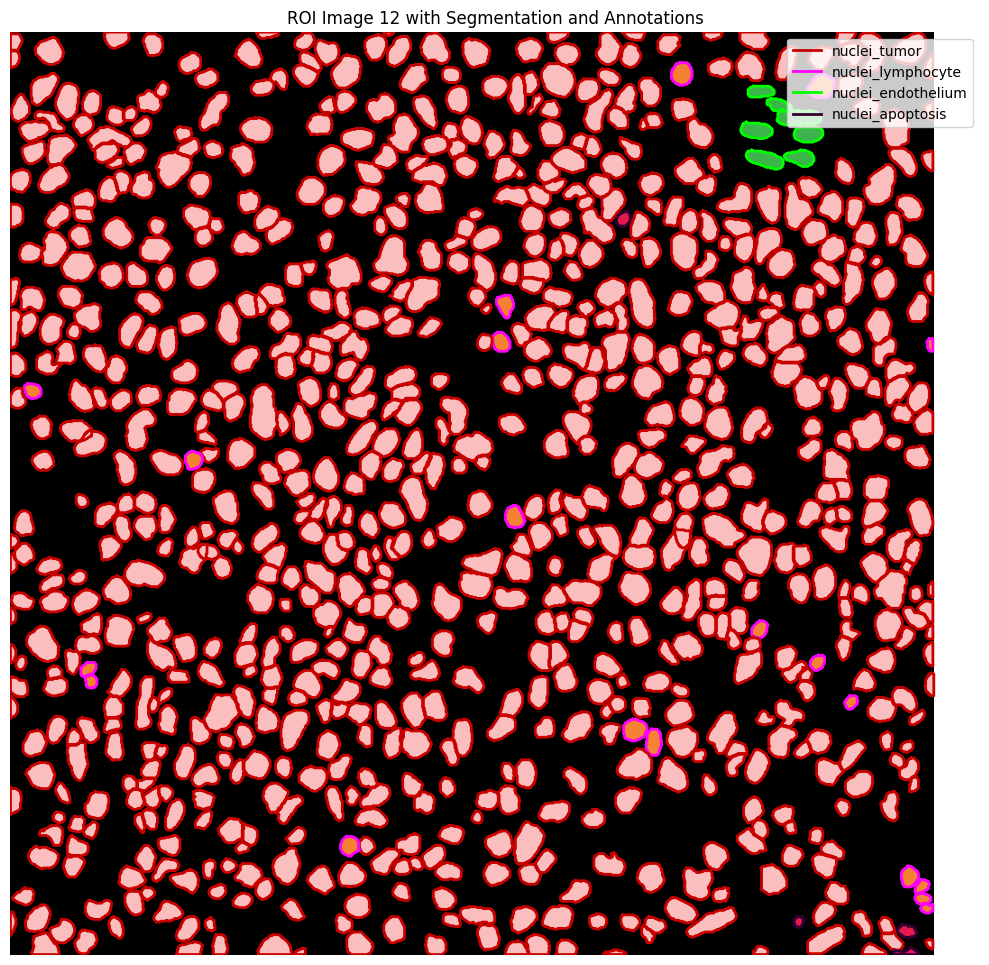

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from shapely.geometry import Polygon, MultiPolygon

# --- Step 1: Blend the segmentation mask onto the ROI image ---

# Normalize mask
if segmentation_mask.max() == 0:
    normalized_mask = segmentation_mask.astype(np.float32)
else:
    normalized_mask = segmentation_mask.astype(np.float32) / segmentation_mask.max()

# Apply colormap
mask_rgba = cmap(normalized_mask)  # shape: (H, W, 4)
mask_rgb = mask_rgba[..., :3]  # RGB
alpha_mask = mask_rgba[..., 3:]  # Alpha channel, shape: (H, W, 1)

# Prepare ROI image
roi_rgb = roi_image_matplotlib[..., :3].astype(np.float32) / 255.0  # Drop alpha if present

# Blend
overlay_rgb = roi_rgb * (1 - alpha_mask) + mask_rgb * alpha_mask
overlay_uint8 = (overlay_rgb * 255).astype(np.uint8)

# --- Step 2: Plot blended image and vector annotations ---

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(overlay_uint8)

# Overlay vector annotations
for _, row in nuclei_gdf.iterrows():
    geom = row.geometry
    if geom.is_empty:
        continue

    color = get_color(row)  # Define a function that returns a color
    label = get_name(row)   # Define a function that returns a name/label

    if isinstance(geom, Polygon):
        x, y = geom.exterior.xy
        ax.plot(x, y, color=color, linewidth=2, label=label)

    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:
            x, y = poly.exterior.xy
            ax.plot(x, y, color=color, linewidth=2, label=label)

# Remove duplicate labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

ax.set_title(f"ROI Image {IMAGE_NUMBER} with Segmentation and Annotations")
ax.axis('off')
plt.tight_layout()
plt.show()